Code for OCR using ML model (Transfer Learning)

Code by AYUSH AGARWAL, IIT BHU ECE'24, Infoedge DS 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import os

import cv2

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, models

In [3]:
# Just checking sizes of few images 
img = cv2.imread("/kaggle/input/standard-ocr-dataset/data/training_data/Q/10034.png")
print(img.shape)

# Most of them have sizes around 20-30 ish pixels in data2
# And 30-40 in data , I will use data then as I need 32 size 

(46, 35, 3)


In [4]:
# Easiest to understand Data loader which I could find 
# https://www.kaggle.com/code/subhraneelpaul/ocr-nn

# Slightly more complicated data loader which made a function of the above one 
# https://www.kaggle.com/code/thibautjuill/ocr-basic

# Another version which makes a table with links to images and labels, but this method is complicated
# https://www.kaggle.com/code/yousefelbaroudy/optical-character-recognition-ocr-using-dl#3)-Reading-&-preparing-the-dataset

import os 

def load_data(data_path):
    images = []
    labels = []
    label_mapping = {}

    for label_dir in os.listdir(data_path):
        if not label_dir.startswith('.'):
            label_mapping[len(label_mapping)] = label_dir

            label_path = os.path.join(data_path, label_dir)
            for image_file in os.listdir(label_path):
                if not image_file.startswith('.'):
                    image_path = os.path.join(label_path, image_file)
                    label = len(label_mapping) - 1
                    # https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR) # cv2.IMREAD_GRAYSCALE
                    image = cv2.resize(image, (32, 32))  # Resize images to a common size
                    images.append(image)
                    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_mapping

# The code iterates through each subdirectory (label_dir) in the main directory (data_path).
# It skips any directories or files that start with a dot (hidden files in Unix-like systems).
# Each valid subdirectory name is added to label_mapping with the current length of label_mapping 
# as the key, effectively creating a mapping from numerical labels to directory names.

# For each subdirectory (label), it constructs the full path (label_path).
# It iterates over each file (image_file) in the subdirectory, again skipping hidden files.
# It constructs the full path to the image file (image_path) and sets the label to the current subdirectory's index.
# The image is read in grayscale mode using OpenCV (cv2.imread with cv2.IMREAD_GRAYSCALE).
# The image is resized to 28x28 pixels using OpenCV's cv2.resize.
# The processed image is appended to the images list.
# The corresponding label is appended to the labels list.

In [5]:
# Loading train and test data using the above loader function 

train_data_path = "/kaggle/input/standard-ocr-dataset/data/training_data"
train_images, train_labels, train_label_mapping = load_data(train_data_path)

print(train_images.shape)
print(train_labels.shape)
print(train_label_mapping)

test_data_path = "/kaggle/input/standard-ocr-dataset/data/testing_data"
test_images, test_labels, test_label_mapping = load_data(test_data_path)

print(train_images.shape)
print(train_labels.shape)
print(train_label_mapping)

(20628, 32, 32, 3)
(20628,)
{0: 'N', 1: '7', 2: 'R', 3: '2', 4: 'B', 5: 'I', 6: 'F', 7: 'H', 8: '5', 9: 'E', 10: 'U', 11: 'M', 12: '8', 13: 'X', 14: '0', 15: 'K', 16: 'Q', 17: 'Y', 18: 'S', 19: 'G', 20: 'A', 21: 'O', 22: 'T', 23: 'V', 24: 'Z', 25: '3', 26: '1', 27: 'C', 28: '4', 29: 'P', 30: '9', 31: 'L', 32: '6', 33: 'W', 34: 'D', 35: 'J'}
(20628, 32, 32, 3)
(20628,)
{0: 'N', 1: '7', 2: 'R', 3: '2', 4: 'B', 5: 'I', 6: 'F', 7: 'H', 8: '5', 9: 'E', 10: 'U', 11: 'M', 12: '8', 13: 'X', 14: '0', 15: 'K', 16: 'Q', 17: 'Y', 18: 'S', 19: 'G', 20: 'A', 21: 'O', 22: 'T', 23: 'V', 24: 'Z', 25: '3', 26: '1', 27: 'C', 28: '4', 29: 'P', 30: '9', 31: 'L', 32: '6', 33: 'W', 34: 'D', 35: 'J'}


In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications
# different models for transfer learning 

# I plan to train a resnet on the data 
# https://www.tensorflow.org/api_docs/python/tf/keras/applications
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet

# official tensorflow guide for transfer learning 
# not a very good guide tho , will have to seek more material 
# https://www.tensorflow.org/tutorials/images/transfer_learning

# https://keras.io/api/applications/resnet/
#  resnet needs atleast 32x32 images

# Resnet original paper 
# https://arxiv.org/pdf/1512.03385

from tensorflow.keras.applications import ResNet50

In [19]:
# https://www.kaggle.com/code/suniliitb96/tutorial-keras-transfer-learning-with-resnet50

model = models.Sequential(
layers=[
    ResNet50(include_top = False,input_shape=(32,32,3),weights='imagenet',pooling='avg'),
    layers.Flatten(),
    layers.Dense(36, activation = 'softmax')
])

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),       #'adam', default lr is 0.001 for adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.build()
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │        73,764 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,661,476 (90.26 MB)

 Trainable params: 73,764 (288.14 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [27]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=200,
                    validation_data=(test_images, test_labels))


Epoch 1/10
  9/104 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9157 - loss: 0.3435

W0000 00:00:1716055732.311131      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9172 - loss: 0.3224

W0000 00:00:1716055736.190293      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716055739.924104      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.9173 - loss: 0.3221 - val_accuracy: 0.9554 - val_loss: 0.1342
Epoch 2/10
  7/104 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9403 - loss: 0.2060

W0000 00:00:1716055741.696741      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9428 - loss: 0.2078 - val_accuracy: 0.9613 - val_loss: 0.1101
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9544 - loss: 0.1593 - val_accuracy: 0.9802 - val_loss: 0.0775
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9654 - loss: 0.1277 - val_accuracy: 0.9573 - val_loss: 0.1083
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9649 - loss: 0.1200 - val_accuracy: 0.9752 - val_loss: 0.0744
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9743 - loss: 0.0937 - val_accuracy: 0.9831 - val_loss: 0.0634
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9779 - loss: 0.0806 - val_accuracy: 0.9712 - val_loss: 0.0691
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9774 - loss: 0.0806 - val_accuracy: 0.9841 - val_loss: 0.0578
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9792 - loss: 0.0724 - val_accuracy: 0.987

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │        73,764 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,809,006 (90.82 MB)

 Trainable params: 73,764 (288.14 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 147,530 (576.29 KB)

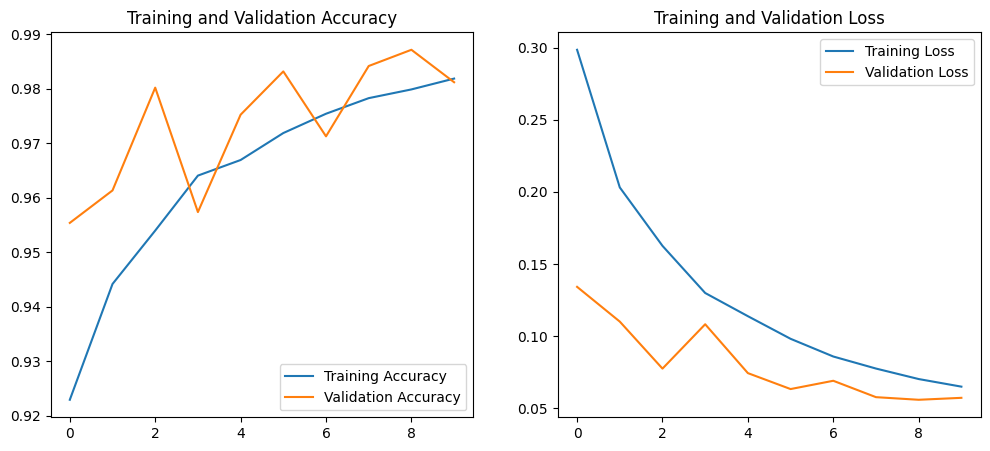

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10 # was meant to be defined above but we directly wrote 10 there so defining here
epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
# Saving ML model as .keras format

model.save('ocr_model.keras')
# https://www.tensorflow.org/tutorials/keras/save_and_load
saved_model = tf.keras.models.load_model('ocr_model.keras')

# Show the model architecture
saved_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │        73,764 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,809,006 (90.82 MB)

 Trainable params: 73,764 (288.14 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 147,530 (576.29 KB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[9.9989653e-01 2.2620694e-11 2.2844349e-10 ... 7.8386302e-06
  1.7825509e-13 4.9322239e-12]
 [9.9998283e-01 1.4579926e-10 6.1870148e-11 ... 7.4763967e-08
  9.6648865e-15 2.6459993e-12]
 [9.9318814e-01 1.8308578e-08 1.0953382e-04 ... 2.1037846e-04
  9.9053743e-09 1.3565323e-09]
 ...
 [2.1444692e-10 1.0328202e-11 1.1272839e-16 ... 1.1342515e-14
  3.4435074e-10 9.9999964e-01]
 [5.8600602e-07 1.2510871e-08 1.4613535e-07 ... 3.8261110e-08
  6.4707066e-08 9.9930859e-01]
 [8.9317318e-06 7.3078638e-07 1.3697782e-05 ... 2.5009103e-07
  4.7590356e-06 9.9948704e-01]]


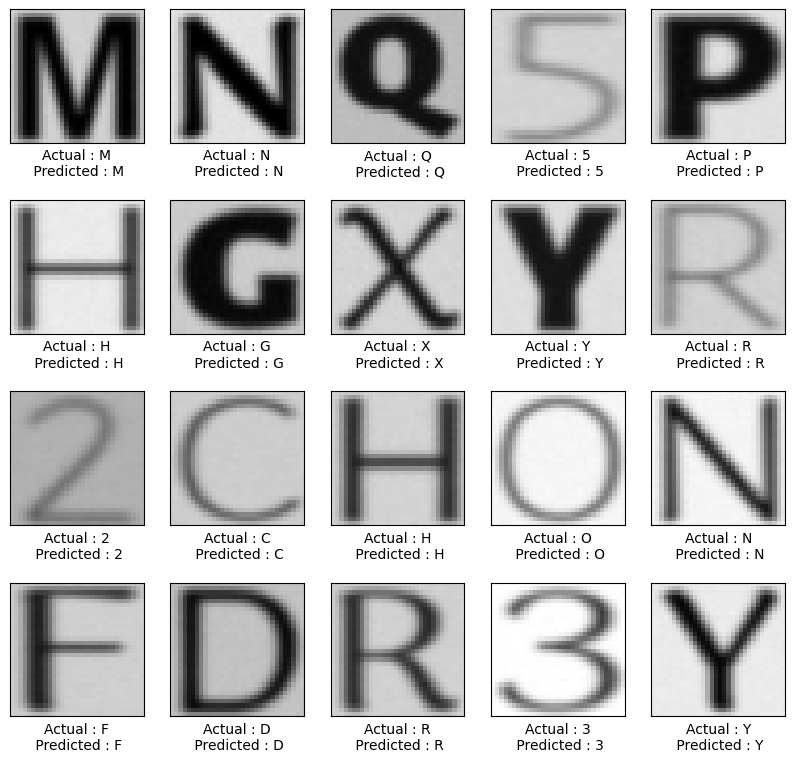

In [37]:
# To see the model predictions on few cases
import random
# probability_model = tf.keras.Sequential([cnn_model_1,
#                                          tf.keras.layers.Softmax()])
predictions = model.predict(test_images)
print(predictions)
plt.figure(figsize=(10,12))


for i in range(20):
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
    plt.subplot(5,5,i+1)
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    # we can set x and y labels in a plot
    j = random.randint(0,1008)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[j], cmap=plt.cm.binary)
    # here we used the array which we made above to replace numbers with names
    plt.xlabel("Actual : " + str(test_label_mapping[test_labels[j]]) + "\n Predicted : " + str(test_label_mapping[np.argmax(predictions[j])]))
    # plt.ylabel(class_names[np.argmax(predictions[i])])
plt.show()

Code by 

Ayush Agarwal 

IIT BHU ECE'24

Infoedge DS